### Imports

In [23]:
import warnings
warnings.simplefilter("ignore")

from sktime.forecasting.compose import RecursiveTimeSeriesRegressionForecaster
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.sarimax import SARIMAX
from sktime.utils.plotting import plot_series
import pandas as pd
import numpy as np

### Leitura do dataset, formatação dele

In [21]:
df = pd.read_csv("../data/pessoas_ocupadas_2012-2019.csv")
df = df.T
df = df.rename(columns={0:"populacao"})
df.index = pd.to_datetime(df.index)
df.index = df.index.to_period("M")
df.populacao = pd.to_numeric(df.populacao)
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2012-01 to 2019-12
Freq: M
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2012-01 to 2019-12
Freq: M
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


<Axes: >

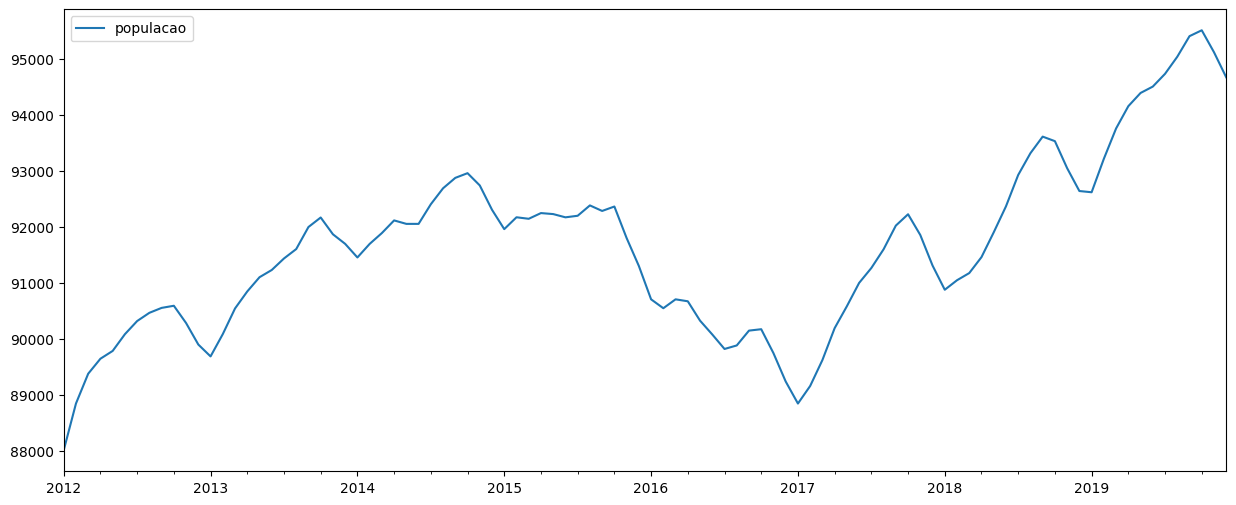

In [25]:
df.plot(figsize=(15,6))

## Separação treino e teste

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

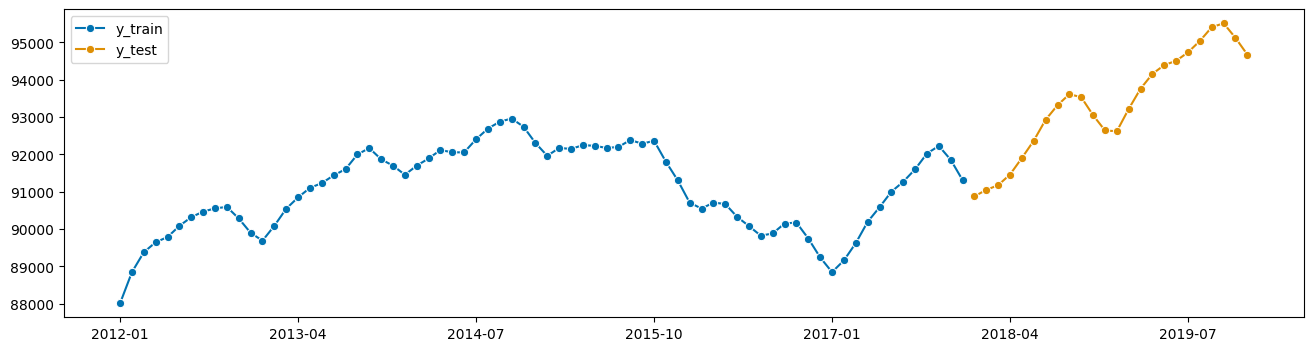

In [26]:
y = df
y_train, y_test = temporal_train_test_split(y)
fh = np.arange(len(y_test))+1
plot_series(y_train, y_test, labels=["y_train", "y_test"])

## Previsões com o método Forecaster 

SMAPE para estratégia last:  MeanAbsolutePercentageError(multilevel=         populacao
2018-01      90879
2018-02      91049
2018-03      91177
2018-04      91462
2018-05      91905
2018-06      92369
2018-07      92930
2018-08      93319
2018-09      93615
2018-10      93534
2018-11      93051
2018-12      92643
2019-01      92621
2019-02      93219
2019-03      93761
2019-04      94159
2019-05      94395
2019-06      94509
2019-07      94737
2019-08      95042
2019-09      95410
2019-10      95515
2019-11      95123
2019-12      94675,
                            multioutput=         populacao
2018-01    91312.0
2018-02    91312.0
2018-03    91312.0
2018-04    91312.0
2018-05    91312.0
2018-06    91312.0
2018-07    91312.0
2018-08    91312.0
2018-09    91312.0
2018-10    91312.0
2018-11    91312.0
2018-12    91312.0
2019-01    91312.0
2019-02    91312.0
2019-03    91312.0
2019-04    91312.0
2019-05    91312.0
2019-06    91312.0
2019-07    91312.0
2019-08    91312.0
2019-09    91312.

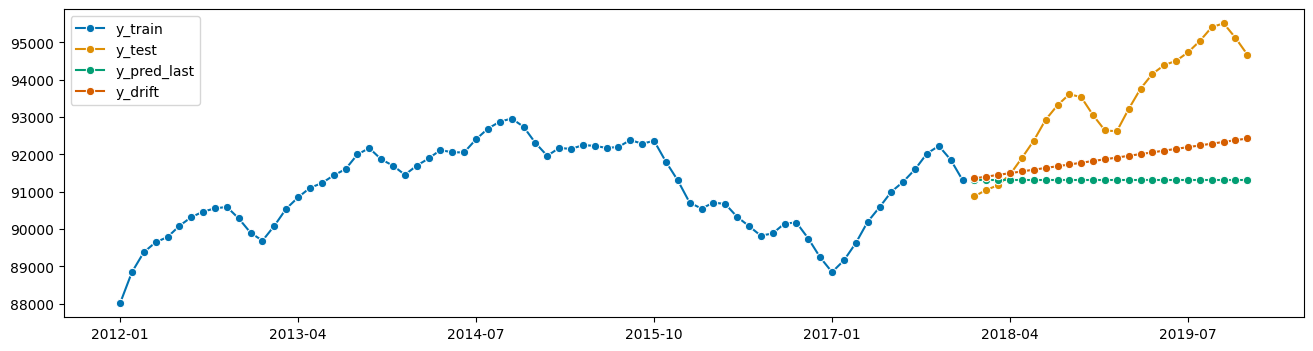

In [27]:
# Naive Forecaster com estratégia 'last'

naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(fh)

# Naive Forecaster com estratégia 'drift' e sp=12

naive_forecaster_drift = NaiveForecaster(strategy="drift",sp=12)
naive_forecaster_drift.fit(y_train)
y_drift = naive_forecaster_drift.predict(fh)

plot_series(y_train, y_test, y_last,y_drift, labels=["y_train", "y_test", "y_pred_last","y_drift"]);
print('SMAPE para estratégia ''last'': ', MeanAbsolutePercentageError(y_last, y_test))
print('SMAPE para estratégia ''drift'': ', MeanAbsolutePercentageError(y_drift, y_test))

## Previsões com ARIMA

SMAPE usando ARIMA:  MeanAbsolutePercentageError(multilevel=         populacao
2018-01      90879
2018-02      91049
2018-03      91177
2018-04      91462
2018-05      91905
2018-06      92369
2018-07      92930
2018-08      93319
2018-09      93615
2018-10      93534
2018-11      93051
2018-12      92643
2019-01      92621
2019-02      93219
2019-03      93761
2019-04      94159
2019-05      94395
2019-06      94509
2019-07      94737
2019-08      95042
2019-09      95410
2019-10      95515
2019-11      95123
2019-12      94675,
                            multioutput=            p...
2018-06  90484.361385
2018-07  90465.475355
2018-08  90524.344588
2018-09  90776.629877
2018-10  90846.276199
2018-11  90724.486159
2018-12  90506.165525
2019-01  90332.206369
2019-02  90352.853817
2019-03  90401.645852
2019-04  90546.558359
2019-05  90679.210940
2019-06  90827.433733
2019-07  90963.038043
2019-08  91065.183219
2019-09  91181.178186
2019-10  91250.299423
2019-11  91214.759972
2019-12  91

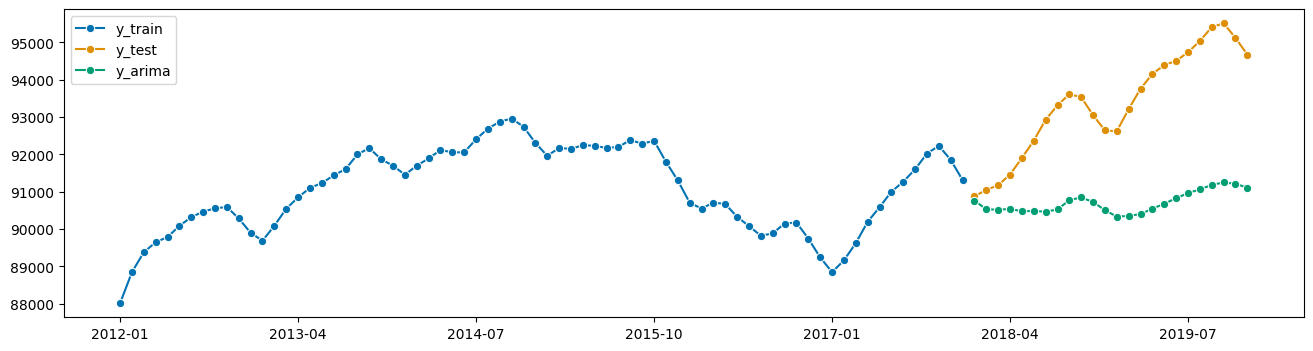

In [28]:
arima_forecasting = AutoARIMA(sp=12)
arima_forecasting.fit(y_train)

# Modelo pode demorar um pouco pois irá testar vários parâmetros.
y_arima = arima_forecasting.predict(fh)

plot_series(y_train, y_test, y_arima, labels=['y_train', 'y_test', 'y_arima'])
print('SMAPE usando ARIMA: ', MeanAbsolutePercentageError(y_arima, y_test))

#### O modelo ARIMA preveu tão corretamente que sobrepôs a linha de y_test. Logo, é o melhor modelo para ser usado no tópico de População.

## Previsões com SARIMA

SMAPE usando SARIMA:  MeanAbsolutePercentageError(multilevel=         populacao
2018-01      90879
2018-02      91049
2018-03      91177
2018-04      91462
2018-05      91905
2018-06      92369
2018-07      92930
2018-08      93319
2018-09      93615
2018-10      93534
2018-11      93051
2018-12      92643
2019-01      92621
2019-02      93219
2019-03      93761
2019-04      94159
2019-05      94395
2019-06      94509
2019-07      94737
2019-08      95042
2019-09      95410
2019-10      95515
2019-11      95123
2019-12      94675,
                            multioutput=            p...
2018-06  91096.536771
2018-07  91066.404449
2018-08  91039.829668
2018-09  91016.664028
2018-10  90994.509309
2018-11  90970.683701
2018-12  90947.720214
2019-01  90930.170227
2019-02  90914.372954
2019-03  90900.174924
2019-04  90887.249659
2019-05  90875.259497
2019-06  90864.310623
2019-07  90854.686769
2019-08  90845.999360
2019-09  90838.159054
2019-10  90831.069574
2019-11  90824.640415
2019-12  9

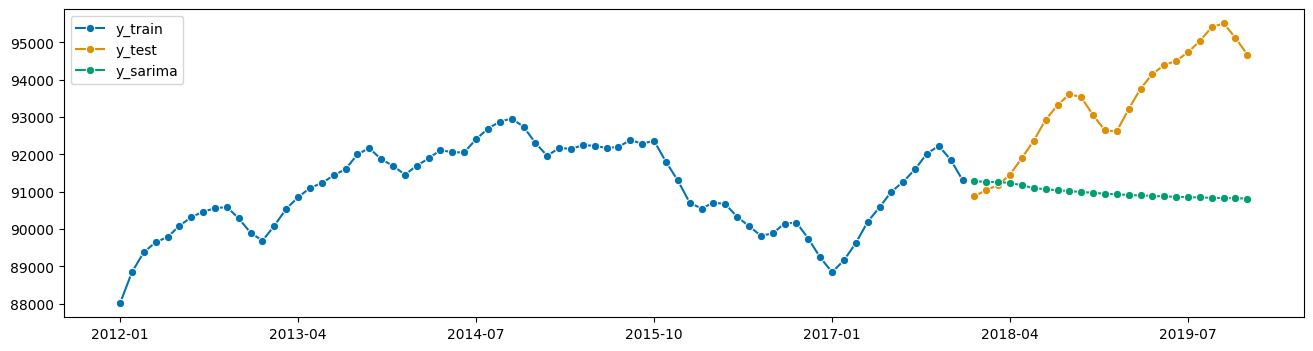

In [29]:
sarima_forecasting = SARIMAX(order=(1, 0, 0), trend="c", seasonal_order=(1, 0, 0, 6))
sarima_forecasting.fit(y_train)

# Modelo pode demorar um pouco pois irá testar vários parâmetros.
y_sarima = sarima_forecasting.predict(fh)

plot_series(y_train, y_test, y_sarima, labels=['y_train', 'y_test', 'y_sarima'])
print('SMAPE usando SARIMA: ', MeanAbsolutePercentageError(y_sarima, y_test))